<h1><i><strong>1. Importing Libraries and Modules</strong></i></h1>
<h3>This cell imports the necessary libraries and modules for the project. It includes:</h3>
<ul>
    <li><strong><code>KNeighborsClassifier</code></strong>, <strong><code>GridSearchCV</code></strong>, <strong><code>roc_curve</code></strong>, and <strong><code>auc</code></strong> from <code>sklearn</code> for model training, hyperparameter tuning, and evaluation.</li>
    <li><strong><code>Flatten</code></strong> and <strong><code>to_categorical</code></strong> from <code>keras.api</code> for data preprocessing and one-hot encoding.</li>
    <li><strong><code>matplotlib.pyplot</code></strong> for visualizations.</li>
    <li><strong><code>numpy</code></strong> and <strong><code>pandas</code></strong> for handling data and arrays.</li>
    <li>Adds the custom path to the system to import <strong><code>DataLoader</code></strong> and <strong><code>LABELS</code></strong> from the <code>Persian-Alphabet-Recognition</code> project, which loads the dataset and label mappings.</li>
</ul>


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from keras.api.layers import Flatten
from keras.api.utils import to_categorical
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

Libraries Loaded Successfully


<h1><i><strong>2. Defining Dataset Paths and Hyperparameters</strong></i></h1>
<h3>This cell sets the file paths for the datasets and defines key parameters:</h3>
<ul>
    <li><strong><code>DATASET1</code></strong>, <strong><code>DATASET2</code></strong>, <strong><code>DATASET3</code></strong>, and <strong><code>REAL_DATA</code></strong> store file paths for different Persian alphabet datasets.</li>
    <li><strong><code>IMAGE_SIZE</code></strong>, <strong><code>SHRINK</code></strong>, and <strong><code>INPUT_SHAPE</code></strong> specify image dimensions, data shrinking factor, and input shape for models.</li>
    <li><strong><code>CLASSES</code></strong> represents the number of distinct classes (43 Persian characters).</li>
    <li><strong><code>THRESHOLD</code></strong> is a parameter that might influence data filtering (<em>not used directly here</em>).</li>
    <li><strong><code>EPOCHS</code></strong> defines the number of training epochs if used in training deep models.</li>
</ul>


In [2]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20

<h1><i><strong>3. Loading and Visualizing the Dataset</strong></i></h1>
<h3>In this cell:</h3>
<ol>
    <li>Loads the dataset using <strong><code>DataLoader</code></strong>, resizing and processing images based on defined parameters.</li>
    <li>Splits data into training and testing sets (<strong><code>X_train</code></strong>, <strong><code>y_train</code></strong>, <strong><code>X_test</code></strong>, <strong><code>y_test</code></strong>).</li>
    <li>Prints the shapes of training and testing data arrays to verify loading.</li>
    <li>Flattens <strong><code>X_train</code></strong> and <strong><code>X_test</code></strong> for model input compatibility.</li>
    <li>Plots a sample image for each class (42 classes in total) from the training set to visually confirm data correctness.</li>
</ol>


Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


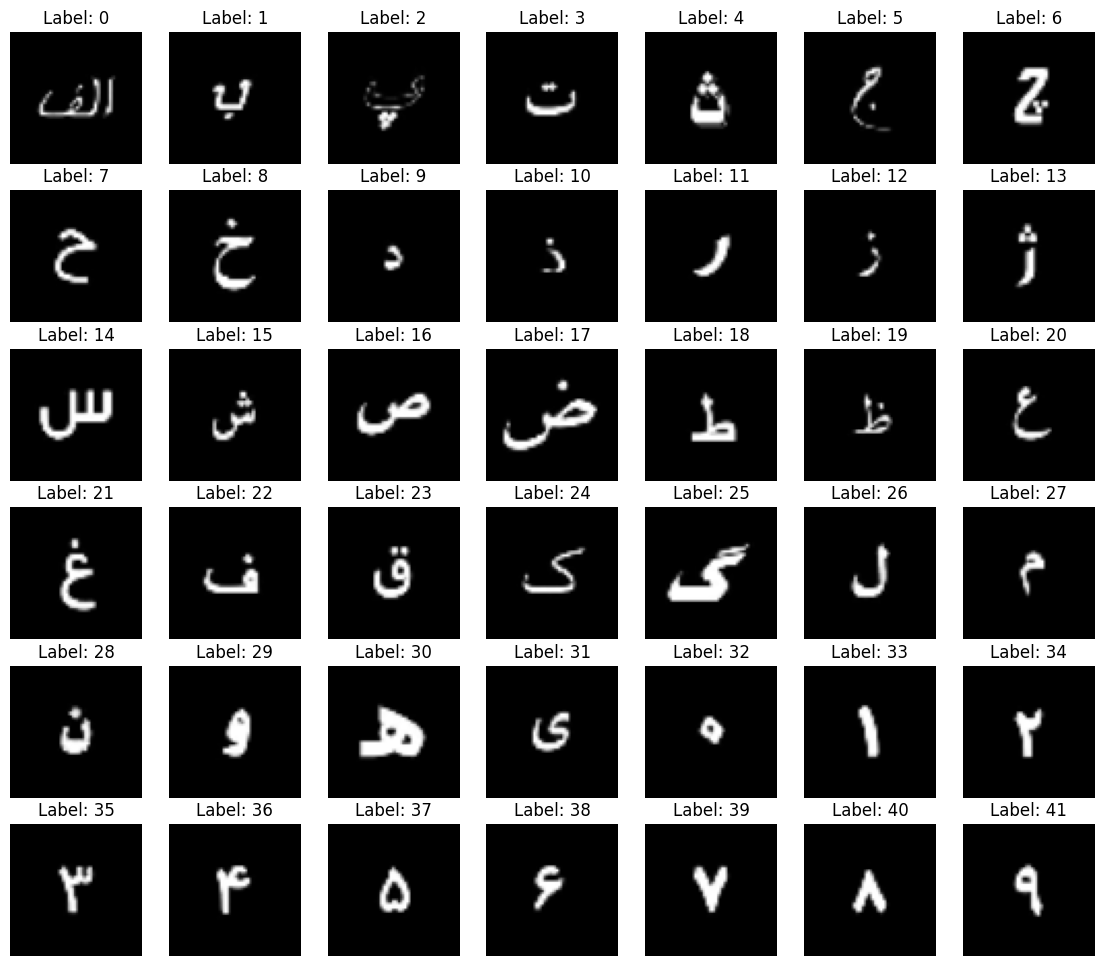

In [3]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, contrast=None, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

X_train_1d = np.array(Flatten()(X_train))
X_test_1d = np.array(Flatten()(X_test))

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

<h1><i><strong>4. Initializing and Configuring K-Nearest Neighbors with Grid Search</strong></i></h1>
<h3>In this cell:</h3>
<ol>
    <li>Initializes a <strong><code>KNeighborsClassifier</code></strong> instance.</li>
    <li>Defines a <strong><code>knn_params</code></strong> dictionary with hyperparameter options for grid search.</li>
    <li>Flattens <strong><code>X_train</code></strong> for model input and prints its shape for verification.</li>
    <li>Performs a <strong><code>GridSearchCV</code></strong> on the k-NN model to find the best hyperparameters based on the training data.</li>
    <li>Outputs the best parameters and score from the grid search.</li>
</ol>


In [5]:
knn = KNeighborsClassifier()

knn_params = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'p': [0.5, 1, 2]}

knn_grid_srch = GridSearchCV(knn, param_grid=knn_params, verbose=2)
knn_grid_srch.fit(X_train_1d, y_train)

print(f">> Best Params : {knn_grid_srch.best_params_}")
print(f">> Best Score : {knn_grid_srch.best_score_}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=uniform; total time=   0.4s
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=uniform; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=uniform; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=uniform; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=uniform; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=distance; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=distance; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=distance; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=distance; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=3, p=0.5, weights=distance; total time=   0.2s
[CV] END metric=euclidean, n_neighbors=3, p=1, weights=uniform; total time=   0.2s


<h1><i><strong>5. Training the Final K-Nearest Neighbors Model</strong></i></h1>
<h3>In this cell:</h3>
<ul>
    <li>Uses the best estimator found by the grid search to train the final k-NN model on the training data (<strong><code>best_knn.fit()</code></strong>).</li>
    <li>The model is now ready for evaluation and prediction tasks.</li>
</ul>


In [7]:
best_knn = knn_grid_srch.best_estimator_
best_knn.fit(X_train_1d, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=0.5,
                     weights='distance')

<h1><i><strong>6. Evaluating the Model Performance with ROC Curves</strong></i></h1>
<h3>This cell evaluates the model's performance on the test data by calculating and visualizing the ROC curves for each class:</h3>
<ol>
    <li>Prints the validation accuracy of the model using <strong><code>best_knn.score()</code></strong> on the test data.</li>
    <li>Predicts probabilities for each test sample using <strong><code>predict_proba()</code></strong>.</li>
    <li>Converts the test labels into one-hot encoded format for compatibility with ROC curve calculations.</li>
    <li>Calculates the false positive rate (FPR) and true positive rate (TPR) for each class using <strong><code>roc_curve()</code></strong> and calculates the area under the curve (AUC) using <strong><code>auc()</code></strong>.</li>
    <li>Plots the ROC curves for each class in a grid of subplots, showing the AUC for each class.</li>
</ol>


Validation Accuracy : 0.9058139534883721


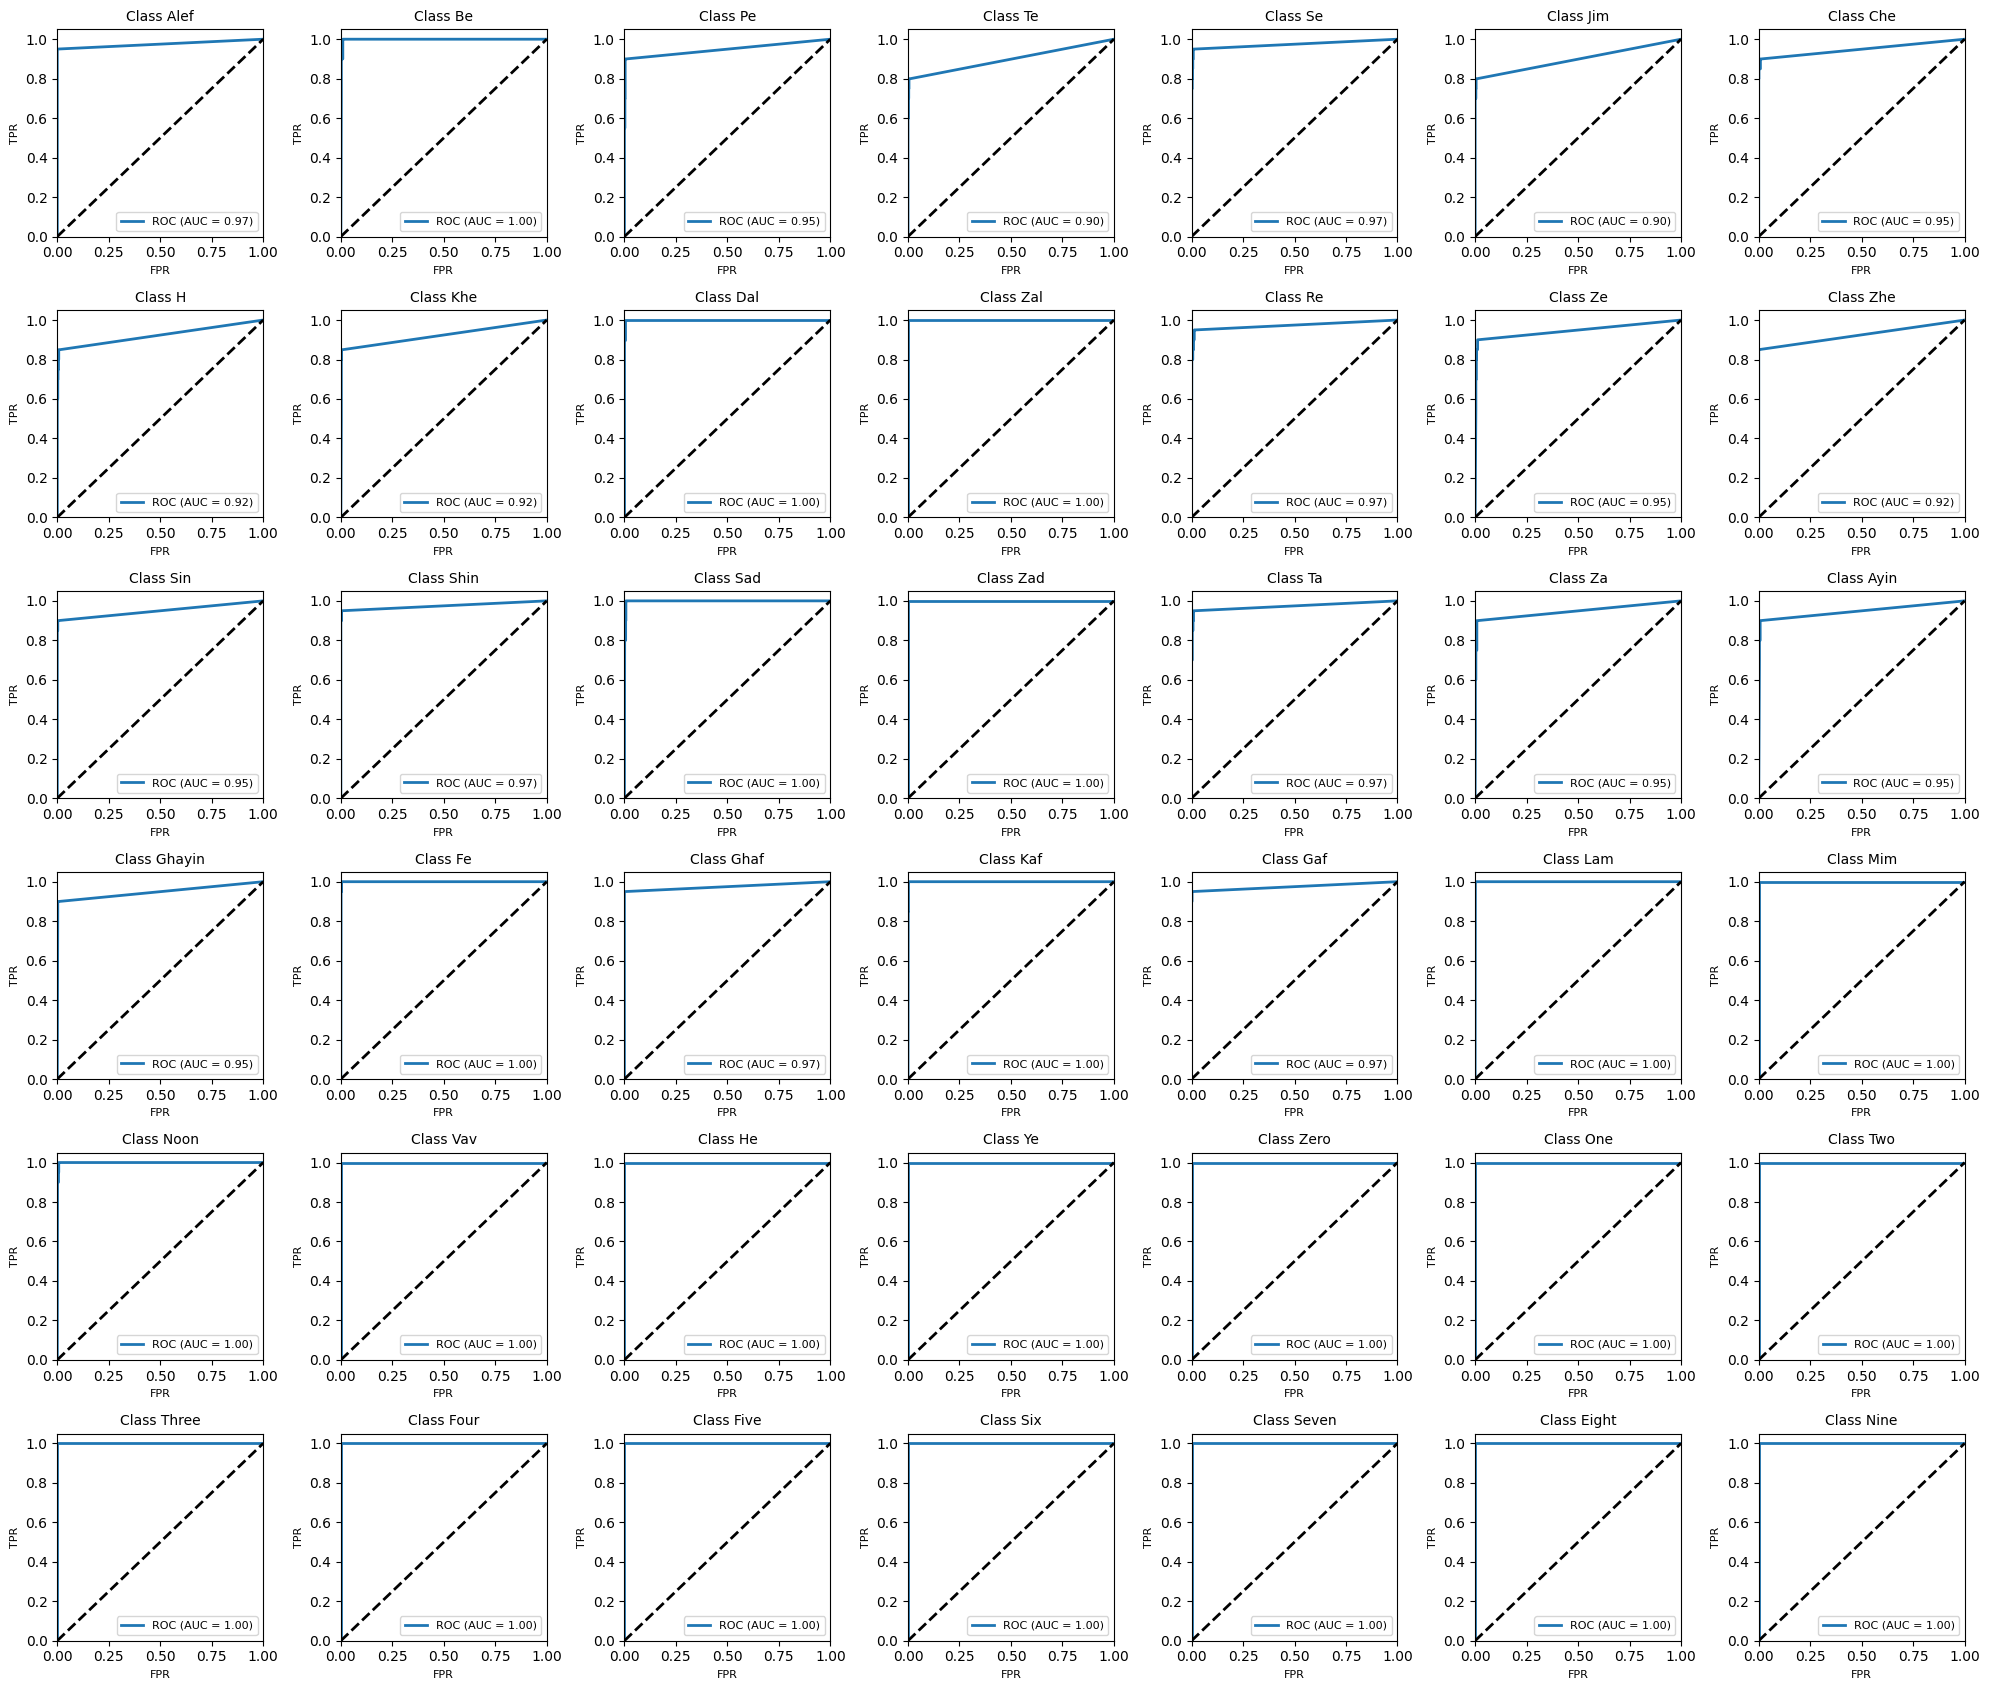

In [8]:
print(f"Validation Accuracy : {best_knn.score(X_test_1d, y_test)}")

predictions = best_knn.predict_proba(X_test_1d)

y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 6  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 17))

axes = axes.flatten()

for i in range(CLASSES-1):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<h1><i><strong>7. Testing on Real Data</strong></i></h1>
<h3>This cell tests the trained model on real-world data:</h3>
<ol>
    <li>Iterates through real images in the <strong><code>REAL_DATA</code></strong> folder.</li>
    <li>Preprocesses the image by centering it using <strong><code>dataloader.centerize()</code></strong> and reshaping it to match the input shape.</li>
    <li>Predicts the class probabilities using <strong><code>best_knn.predict_proba()</code></strong>.</li>
    <li>Displays the image along with the predicted label for each real image.</li>
</ol>


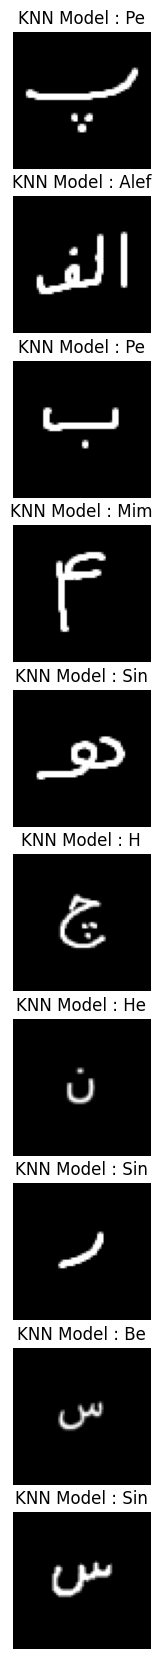

In [10]:
import os
import cv2 as cv

rows = len(os.listdir(REAL_DATA))

plt.figure(figsize=(4, 21))

for i,img_name in enumerate(os.listdir(REAL_DATA)):
    
    image_path = os.path.join(REAL_DATA, img_name)

    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    image = dataloader.centerize(image)

    predictions_test = best_knn.predict_proba(image.reshape(1,INPUT_SHAPE[0]*INPUT_SHAPE[1]))


    plt.subplot(rows, 2, 2*i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'KNN Model : {LABELS[np.argmax(predictions_test)]}')
    plt.axis('off')

plt.show()